In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load the engineered features
df = pd.read_csv("Datasets/engineered_laptop_features.csv")

In [3]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['price_euros'])
y = df['price_euros']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=30
)


In [4]:
# Drop rows with any NaN values in features or target
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # align with new indices

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]


In [5]:
# Check the shapes of the test data 
X_test.shape, y_test.shape 

((242, 127), (242,))

In [6]:
# Initialize the linear regression model
model = LinearRegression()

In [7]:
print(X.isnull().sum()[X.isnull().sum() > 0])


gpu_details    67
dtype: int64


In [8]:
# Train the model
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Display the model's coefficient and intercept 
print(f"Model Coefficient: {model.coef_}") 
print(f"Model Intercept: {model.intercept_}") 

Model Coefficient: [ 1.63098081e-01  6.11910548e+00  2.79904484e-01  3.78981489e+00
  1.53446250e+00  4.78942148e+01 -5.96797184e+00 -1.24344979e-13
 -2.13162821e-14 -1.10844667e-12 -1.27897692e-13  7.60280727e-13
  8.24229573e-13  1.08623566e+01  7.95807864e-13  0.00000000e+00
  2.05349986e+01  8.81072992e-13 -5.68434189e-13  7.95807864e-13
 -4.47287363e+01  2.85940630e+02  1.18255976e+03  1.51371597e+02
  9.25539636e+01  1.79824179e+03  1.25055521e-12  1.69175791e+02
 -4.24689907e+02  9.35325923e+02  2.19185136e+03 -1.10540172e+02
 -1.99615085e+01  3.41060513e-13 -1.60003877e+02 -7.69143426e+01
  1.83541893e+02  2.84834953e+02  4.25097449e+02 -6.25277607e-13
 -3.89929866e+01  3.61849197e+02  4.52517134e+01  1.19468921e+02
  1.91805723e+02 -7.46069873e-13 -9.56742179e+01  6.85558297e+02
  1.13686838e-12 -8.00294874e+01  4.54747351e-13  3.34656400e+02
 -1.09343408e+02  4.54747351e-13  1.72969735e+02  8.22668932e+01
  1.79964295e+02 -1.70530257e-13  1.22796962e+03 -2.84217094e-13
 -1.27

In [12]:
# Make predictions on the training data 
y_train_pred = model.predict(X_train) 
print(f"Predicted training data: {y_train_pred[:10]}") 
print(f"\nActual training data: {(y_train[:10].values)}") 

Predicted training data: [ 609.11151917 1060.52323054 1201.33330925 1082.20162941  762.44796886
  969.59979448  776.72354397 1484.82717899  135.52519895 2389.72430076]

Actual training data: [ 865.    649.   1165.    579.    649.    646.27  859.01 1279.    559.
 1907.99]


In [13]:
# Make predictions on the test data 
y_pred = model.predict(X_test) 
print(f"Predicted training data: {y_pred[:10]}") 
print(f"\nActual training data: {(y_test[:10].values)}")

Predicted training data: [1546.26336043 1150.77776862  864.75233054  696.41647741  860.52612884
 1091.64156611 1201.43869612 1263.87065    2374.35210447 2471.15929735]

Actual training data: [1875.  1268.   403.5  369.   911.  1180.  1389.  1399.  2968.  2799. ]


In [14]:
# Import metrics for evaluating model performance 
from sklearn.metrics import (r2_score,  
mean_absolute_error,  
mean_squared_error,  
root_mean_squared_error) 

In [15]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Root Mean Square Error: {rmse:.2f} euros")
print(f"R-squared Score: {r2:.3f}")

Model Performance Metrics:
Root Mean Square Error: 464.22 euros
R-squared Score: 0.652


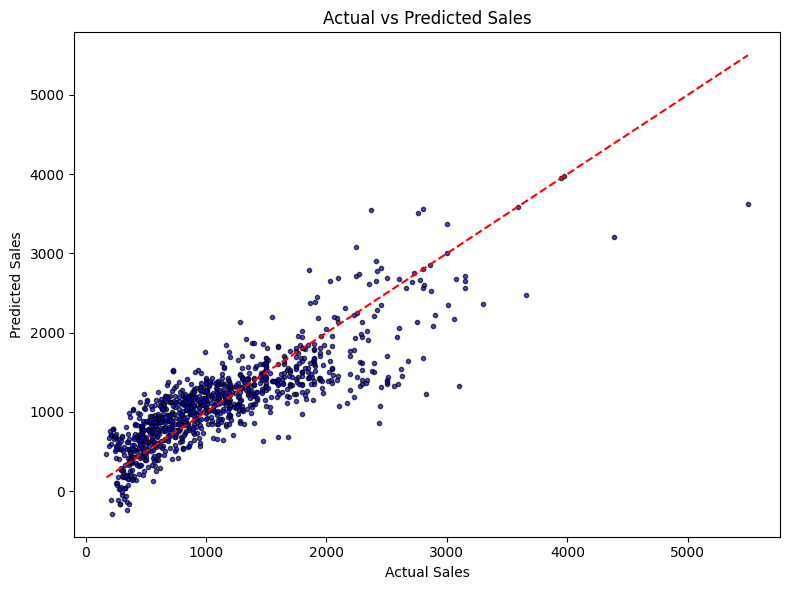

In [16]:
# Plot actual vs. predicted sales for training data 
plt.figure(figsize=(8, 6)) 
plt.scatter(y_train, y_train_pred, color='blue', edgecolor='k', alpha=0.7, 
s=9) 
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
'r--') 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales") 
plt.title("Actual vs Predicted Sales") 
plt.tight_layout() 
plt.show() 

In [22]:
# Calculate evaluation metrics for the test data 
r2 = r2_score(y_test, y_pred) 
mae_val = mean_absolute_error(y_test, y_pred) 
mse_val = mean_squared_error(y_test, y_pred) 
rmse_val = np.sqrt(mse_val) 

print(f"R² Score: {r2:.3f}") 
print(f"MAE: {mae_val:.3f}") 
print(f"MSE: {mse_val:.3f}") 
print(f"RMSE: {rmse_val:.3f}") 

R² Score: 0.652
MAE: 314.639
MSE: 215499.044
RMSE: 464.219


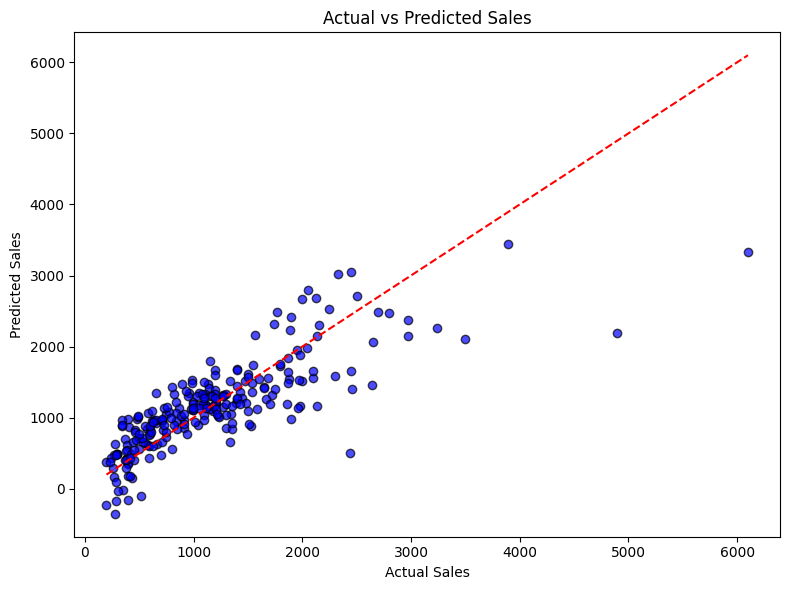

In [19]:
# Plot actual vs. predicted sales for test data 
plt.figure(figsize=(8, 6)) 
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel("Actual Sales") 
plt.ylabel("Predicted Sales") 
plt.title("Actual vs Predicted Sales") 
plt.tight_layout() 
plt.show() 

In [20]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
            Feature  Coefficient  Abs_Coefficient
107   GPUCompany_81  2344.059654      2344.059654
119   GPUCompany_92  2317.545882      2317.545882
30    GPUCompany_11  2191.851357      2191.851357
108   GPUCompany_82  2012.375967      2012.375967
25   GPUCompany_105  1798.241786      1798.241786
86    GPUCompany_62  1772.004966      1772.004966
106   GPUCompany_80  1251.031280      1251.031280
58    GPUCompany_37  1227.969619      1227.969619
22   GPUCompany_102  1182.559760      1182.559760
96    GPUCompany_71 -1102.872104      1102.872104


# Model Evaluation

In [23]:
# Calculate evaluation metrics for the test data 
r2 = r2_score(y_test, y_pred) 
mae_val = mean_absolute_error(y_test, y_pred) 
mse_val = mean_squared_error(y_test, y_pred) 
rmse_val = np.sqrt(mse_val) 

print(f"R² Score: {r2:.3f}") 
print(f"MAE: {mae_val:.3f}") 
print(f"MSE: {mse_val:.3f}") 
print(f"RMSE: {rmse_val:.3f}") 

R² Score: 0.652
MAE: 314.639
MSE: 215499.044
RMSE: 464.219


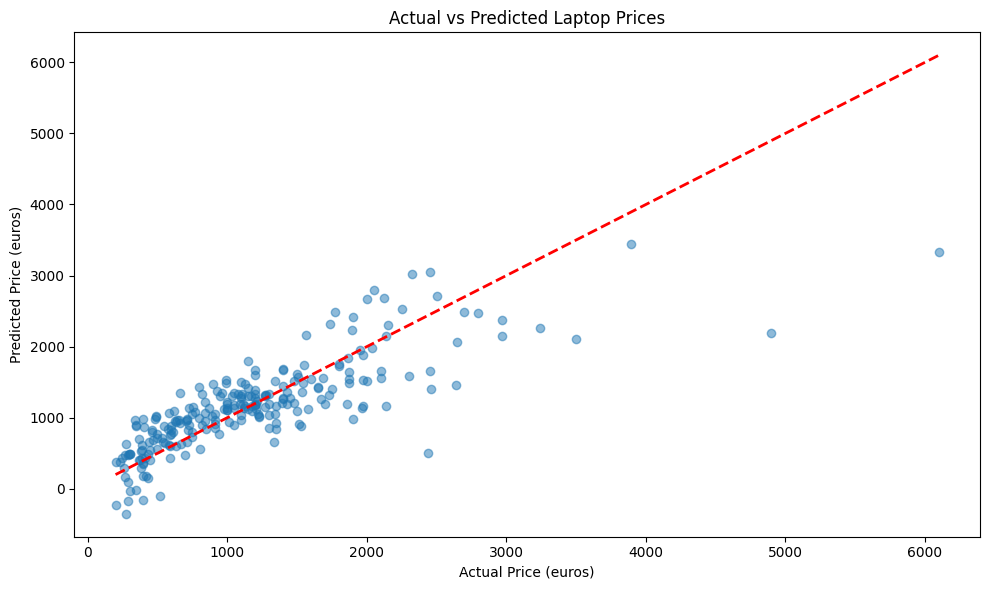

In [24]:
# Visualize Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price (euros)')
plt.ylabel('Predicted Price (euros)')
plt.title('Actual vs Predicted Laptop Prices')
plt.tight_layout()
plt.show()

In [26]:
import seaborn as sns

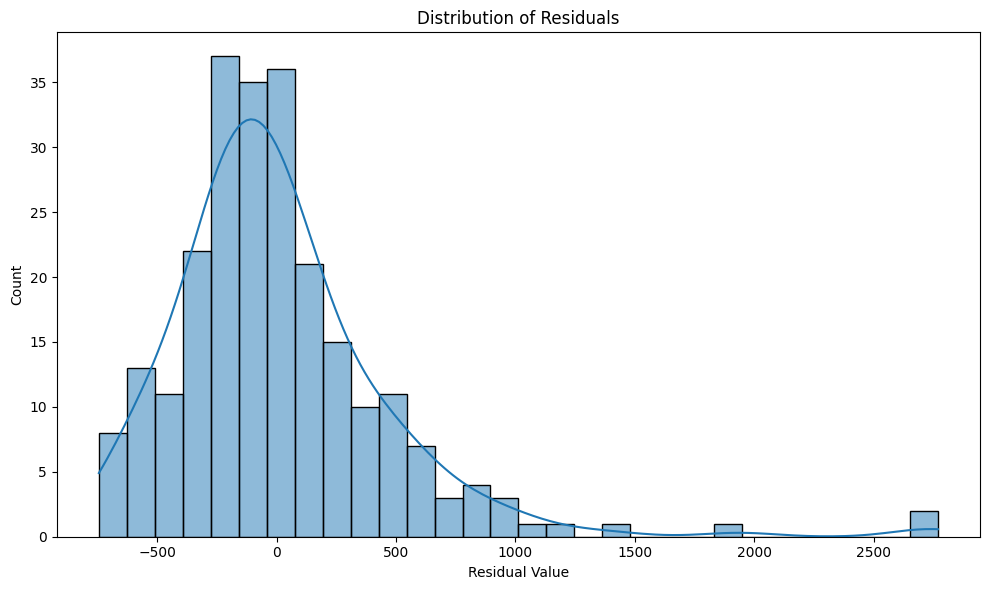

In [27]:
# Visualize Residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()

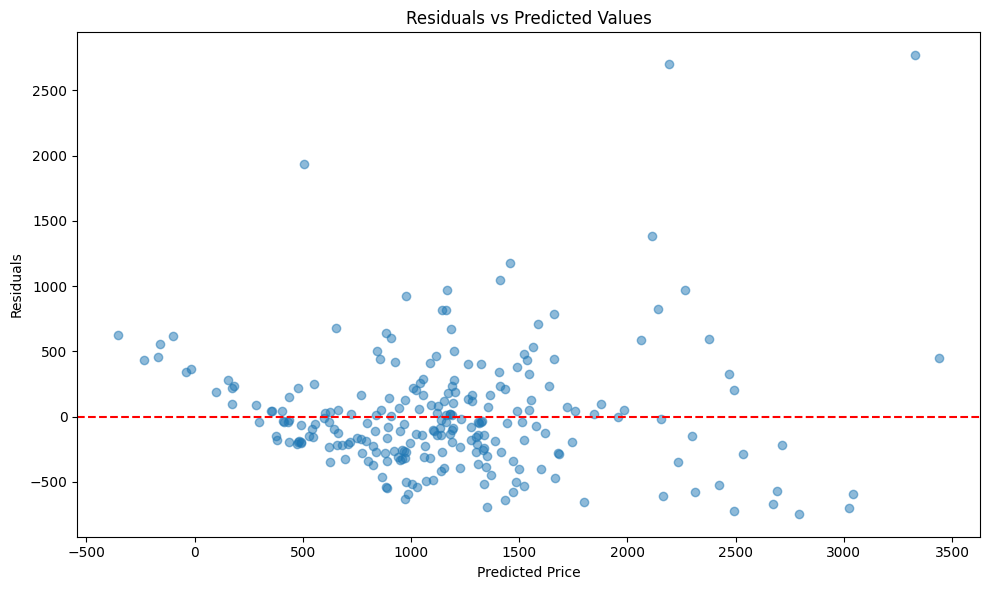

In [28]:
# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'C:/Users/Governor/Documents/Car-Price-Prediction-model/Project_Files/streamlit_app/models/best_model.joblib')

['C:/Users/Governor/Documents/Car-Price-Prediction-model/Project_Files/streamlit_app/modelsbest_model.joblib']